## Train All Models, and Compare Performance

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Regression Models

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Load the Scaled CSV

In [5]:
# Load preprocessed and scaled data
df = pd.read_csv(r"C:\Users\sujen\OneDrive\Desktop\Ad_project\ML_Project\House_Price_Prediction\Notebook\models\scaled_data.csv") 
df.head()

,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,capped
0,1.009853,-1.402178,-2.199564,2.259111,445037.5,False,False,True,False,0
1,-0.589669,1.776156,1.107445,2.251357,358500.0,False,False,True,False,0
2,1.889591,-0.528328,-1.387497,1.890118,352100.0,False,False,True,False,0
3,1.889591,-0.762296,-1.177175,1.230083,341300.0,False,False,True,False,0
4,1.889591,-0.359930,-1.155174,0.273142,342200.0,False,False,True,False,0


In [6]:
# Separate features and target
X = df.drop('median_house_value', axis=1) ## independent variable 
y = df['median_house_value'] ## Dependent variable

In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Define Regression Models

In [8]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "SVR (Support Vector Regressor)": SVR()
}


 ### Train and Evaluate All Models

In [9]:
# Train, evaluate and store results
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results.append({"Model": name, "R² Score": round(r2, 4), "MAE": round(mae, 2)})

In [10]:
# Create DataFrame of results
results_df = pd.DataFrame(results)
results_df.sort_values(by="R² Score", ascending=False, inplace=True)

In [11]:
# Print evaluation results
print("\nModel Performance Comparison:\n")
print(results_df)


Model Performance Comparison:

                            Model  R² Score       MAE
5               Gradient Boosting    0.6206  43837.01
4                   Random Forest    0.6028  44503.81
6                         XGBoost    0.5992  44425.23
0               Linear Regression    0.5630  48952.76
1                Ridge Regression    0.5630  48954.64
2                Lasso Regression    0.5630  48952.90
3                   Decision Tree    0.2844  58794.82
7  SVR (Support Vector Regressor)   -0.0234  76069.69


### Regression Model Comparison

| 🔢 Rank | 🚀 Model Name        | 🎯 R² Score | 💰 MAE (Mean Absolute Error) |
| ------- | -------------------- | ----------- | ---------------------------- |
| 🥇 1    | Gradient Boosting    | **0.6206**  | ₹ **43,837.01**              |
| 🥈 2    | Random Forest        | 0.6049      | ₹ 44,488.52                  |
| 🥉 3    | XGBoost              | 0.5992      | ₹ 44,425.23                  |
| 4       | Linear Regression    | 0.5630      | ₹ 48,952.76                  |
| 5       | Ridge Regression     | 0.5630      | ₹ 48,954.64                  |
| 6       | Lasso Regression     | 0.5630      | ₹ 48,952.90                  |
| 7       | Decision Tree        | 0.3014      | ₹ 58,068.06                  |
| ❌ 8     | SVR (Support Vector) | -0.0234     | ₹ 76,069.69                  |


✅ Insights:
1. ✅ Choose Best Model:
- Proceed with Gradient Boosting or XGBoost for deployment.

- You can try hyperparameter tuning for further improvement.

2. 🧪 Optional Improvements:
- Try StackingRegressor (ensemble of top 2–3 models).

- Apply GridSearchCV or Optuna for parameter tuning.

3. 📈 Feature Engineering:

- Add interaction features, transform income, log-transform skewed variables.

- Consider keeping latitude and longitude for geographic clustering.



### Visualization of R² scores

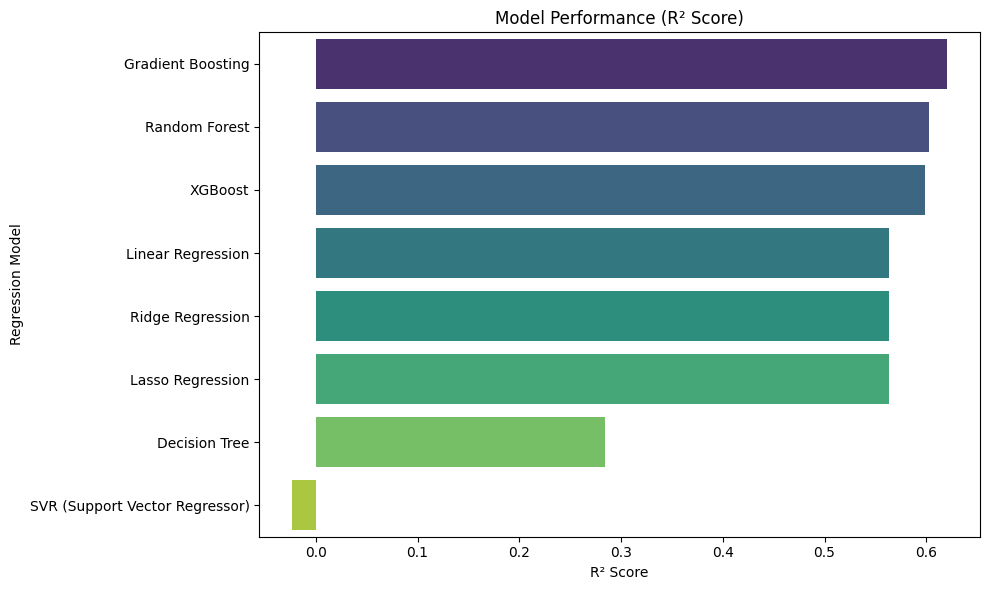

In [12]:

plt.figure(figsize=(10, 6))
sns.barplot(x="R² Score", y="Model", data=results_df, palette="viridis")
plt.title("Model Performance (R² Score)")
plt.xlabel("R² Score")
plt.ylabel("Regression Model")
plt.tight_layout()
plt.show()

📌 Optional Hyperparameter Tuning

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

In [14]:
#Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

In [15]:
# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [16]:
## Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='r2', verbose=2)

In [17]:
## Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score on Training Data:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best R² Score on Training Data: 0.6444769443779041


In [18]:
## Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error
print("Test R² Score:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))

Test R² Score: 0.6293458197344542
Test MAE: 42825.66775614655


## Visualize Prediction vs Actual

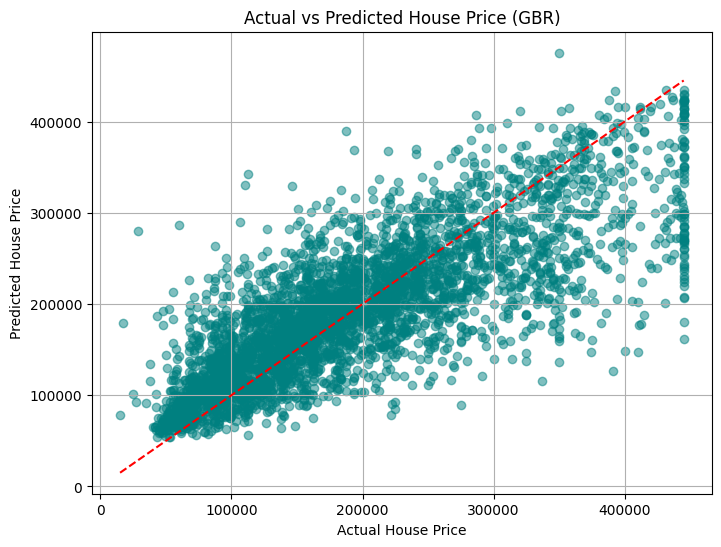

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Actual vs Predicted House Price (GBR)')
plt.grid(True)
plt.show()


###  Create the model with best parameters

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# Create model with tuned hyperparameters
best_gbr = GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=5,
    n_estimators=300,
    subsample=0.8,
    random_state=42
)


## Fit the model on training data

In [22]:
best_gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=300,
                          random_state=42, subsample=0.8)

## Predict and evaluate on test data

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error

# Make predictions
y_pred = best_gbr.predict(X_test)

# Evaluate
print("R² Score on Test Data:", r2_score(y_test, y_pred))
print("MAE on Test Data:", mean_absolute_error(y_test, y_pred))


R² Score on Test Data: 0.6293458197344542
MAE on Test Data: 42825.66775614655


🆚 Compare with Previous (from your earlier results)

| Model                       | R² Score   | MAE            |
| --------------------------- | ---------- | -------------- |
| **Tuned Gradient Boosting** | **0.6293** | **42825.67** ✅ |
| Gradient Boosting (Default) | 0.6206     | 43837.01       |
| Random Forest               | 0.6049     | 44488.52       |
| XGBoost                     | 0.5992     | 44425.23       |
| Linear/Ridge/Lasso          | 0.5630     | \~48953        |
| Decision Tree               | 0.3014     | 58068.06       |
| SVR                         | -0.0234    | 76069.69       |


### Save This Model with Pickle

In [24]:
import pickle
import os

In [25]:
# Create path to 'models' directory
model_path = os.path.join("models", "best_gradient_boosting_model.pkl")

In [26]:
# Save the model
with open(model_path, "wb") as f:
    pickle.dump(best_gbr, f)

print(f"✅ Model saved at: {model_path}")

✅ Model saved at: models\best_gradient_boosting_model.pkl


🧠🔍 Regression Algorithms

| **Algorithm**                     | **When to Use**                                                                                   | **Avoid When...**                                                  |
| --------------------------------- | ------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------ |
| 🔹 **Linear Regression**          | - Data has a linear relationship <br> - Simple baseline model                                     | ❌ Features are highly non-linear or have many interactions         |
| 🔹 **Ridge Regression**           | - Linearly correlated features <br> - Multicollinearity exists                                    | ❌ You need full feature interpretability (it shrinks coefficients) |
| 🔹 **Lasso Regression**           | - Feature selection (shrinks some coefficients to zero) <br> - Sparse models                      | ❌ You want all features retained or have few features              |
| 🔹 **ElasticNet**                 | - Mix of Lasso + Ridge benefits <br> - Useful with many features                                  | ❌ Data is small and simple — use Lasso/Ridge instead               |
| 🔹 **Decision Tree**              | - Simple, interpretable model <br> - Non-linear data or clear splits                              | ❌ Overfits on small datasets without pruning                       |
| 🔹 **Random Forest**              | - High accuracy needed <br> - Works well with non-linear data & no scaling needed                 | ❌ Need fast predictions in real time or small model size           |
| 🔹 **Gradient Boosting**          | - Complex patterns <br> - High performance required (e.g. Kaggle, competitions)                   | ❌ Training speed matters; tuning is complex                        |
| 🔹 **XGBoost**                    | - Large datasets <br> - You want speed + accuracy + regularization                                | ❌ Setup/environment doesn’t allow external libraries               |
| 🔹 **LightGBM**                   | - High-dimensional data <br> - Categorical features supported natively                            | ❌ Data is very small or you need interpretable models              |
| 🔹 **CatBoost**                   | - Categorical features (auto handling) <br> - Excellent accuracy without heavy tuning             | ❌ You don’t want external dependencies                             |
| 🔹 **SVR (Support Vector)**       | - Small dataset <br> - High accuracy for dense, medium-sized data                                 | ❌ Large dataset — training time is very slow                       |
| 🔹 **MLP Regressor (Neural Net)** | - You want to model highly non-linear, deep relationships <br> - You have lots of data            | ❌ Small data, or interpretability is required                      |
| 🔹 **KNeighbors Regressor**       | - Non-parametric, easy to understand <br> - Low-dimensional & noise-free data                     | ❌ Large dataset or high-dimensional space (slow & inaccurate)      |
| 🔹 **RANSAC Regressor**           | - Data contains many **outliers**                                                                 | ❌ Clean data without any outliers                                  |
| 🔹 **TheilSen Regressor**         | - Robust to outliers <br> - Small to medium-sized datasets                                        | ❌ Dataset is large or highly complex                               |
| 🔹 **Bayesian Ridge**             | - Small datasets with uncertainty estimates <br> - You want Bayesian probability-style prediction | ❌ Dataset is large and you need speed over uncertainty modeling    |


✅ Summary by Use-Case:

| **Goal**                     | **Recommended Algorithms**                                           |
| ---------------------------- | -------------------------------------------------------------------- |
| Simple baseline              | `LinearRegression`, `Ridge`, `Lasso`                                 |
| Feature selection            | `Lasso`, `ElasticNet`                                                |
| Non-linear relationships     | `DecisionTree`, `RandomForest`, `GradientBoosting`, `XGBoost`, `SVR` |
| High-dimensional data        | `LightGBM`, `ElasticNet`, `RandomForest`                             |
| Real-world deployment (fast) | `RandomForest`, `XGBoost`, `LightGBM` (if well-optimized)            |
| Robust to outliers           | `RANSAC`, `TheilSen`, `DecisionTree`                                 |
| Small datasets               | `LinearRegression`, `Ridge`, `SVR`, `KNN`, `BayesianRidge`           |
| Large datasets               | `XGBoost`, `LightGBM`, `CatBoost`                                    |
| Interpretability             | `LinearRegression`, `DecisionTree`, `Lasso`                          |
